This Notebook was used to learn how to import .obj files.

Created during an Undergraduate Research Experience Programme placement at Imperial College London 2020
by Jakub Dranczewski.

To contact me, try (in no particular order)
* jbd17@ic.ac.uk (unless I left)
* jakub.dranczewski@gmail.com
* jdranczewski.github.io (there should be an email in the CV)
* some other social media platform

This code should also be available at https://github.com/jdranczewski/optical-levitation-raytracing-experiments

In [1]:
from sys import path
path.insert(0,'..')

import ptracer as pt
import numpy as np
from importlib import reload
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [59]:
with open("six_normals.obj") as f:
    lines = f.readlines()

In [60]:
verts = np.array([np.array(l[2:-1].split(" ")).astype(float) for l in lines if l[:2]=='v '])
print(len(verts))
print(np.sum(verts, axis=0))

68
[-1.5945233e-05 -2.3806571e-05 -4.2080820e-06]


In [61]:
vns = np.array([np.array(l[3:-1].split(" ")).astype(float) for l in lines if l[:3]=='vn '])
print(vns)
print(np.sum(verts, axis=0))

[[-0.3635 -0.6297 -0.6865]
 [ 0.2654 -0.4597 -0.8475]
 [ 0.3635 -0.6297 -0.6865]
 [-0.2654 -0.4597  0.8475]
 [ 0.3635 -0.6297  0.6865]
 [ 0.2654 -0.4597  0.8475]
 [-0.4842 -0.8387  0.249 ]
 [ 0.5    -0.866   0.    ]
 [ 0.4842 -0.8387  0.249 ]
 [-0.4379 -0.7584 -0.4827]
 [ 0.4379 -0.7584 -0.4827]
 [-0.1491 -0.2583  0.9545]
 [ 0.1491 -0.2583  0.9545]
 [-0.1491 -0.2583 -0.9545]
 [ 0.      0.     -1.    ]
 [ 0.1491 -0.2583 -0.9545]
 [-0.4379 -0.7584  0.4827]
 [ 0.4379 -0.7584  0.4827]
 [-0.4842 -0.8387 -0.249 ]
 [ 0.4842 -0.8387 -0.249 ]
 [ 0.      0.      1.    ]
 [-0.2654 -0.4597 -0.8475]
 [-0.3635 -0.6297  0.6865]
 [-0.5    -0.866   0.    ]
 [ 0.9685  0.      0.249 ]
 [ 0.8758  0.      0.4827]
 [ 0.8758  0.     -0.4827]
 [ 0.9685  0.     -0.249 ]
 [ 0.2983  0.      0.9545]
 [ 0.2983  0.     -0.9545]
 [ 0.5308  0.     -0.8475]
 [ 0.7271  0.      0.6865]
 [ 1.      0.      0.    ]
 [ 0.7271  0.     -0.6865]
 [ 0.5308  0.      0.8475]
 [ 0.5     0.866   0.    ]
 [ 0.4842  0.8387  0.249 ]
 

In [62]:
vni = np.array([[int(v.split("/")[2])-1 for v in l[2:-1].split(" ")] for l in lines if l[:2]=='f '])
print(vni)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9  2 10]
 [11  5 12]
 [13 14 15]
 [16  8 17]
 [18 10 19]
 [20 11 12]
 [21 15  1]
 [22 17  4]
 [23 19  7]
 [17 24 25]
 [19 26 27]
 [20 12 28]
 [ 1 29 30]
 [ 4 25 31]
 [ 7 27 32]
 [ 2 30 33]
 [ 5 31 34]
 [ 8 32 24]
 [10 33 26]
 [12 34 28]
 [15 14 29]
 [24 35 36]
 [26 37 38]
 [28 39 40]
 [29 14 41]
 [25 36 42]
 [27 38 43]
 [20 28 40]
 [30 41 44]
 [31 42 45]
 [32 43 35]
 [33 44 37]
 [34 45 39]
 [45 46 47]
 [35 48 49]
 [37 50 51]
 [39 47 52]
 [36 49 53]
 [38 51 54]
 [40 52 55]
 [41 14 56]
 [42 53 46]
 [43 54 48]
 [20 40 55]
 [44 56 50]
 [56 14 57]
 [46 58 59]
 [48 60 61]
 [20 55 62]
 [50 57 63]
 [47 59 64]
 [49 61 65]
 [51 63 66]
 [52 64 67]
 [53 65 58]
 [54 66 60]
 [55 67 62]
 [67 22  3]
 [58 23  6]
 [60  0  9]
 [62  3 11]
 [57 14 13]
 [59  6 16]
 [61  9 18]
 [20 62 11]
 [63 13 21]
 [64 16 22]
 [65 18 23]
 [66 21  0]
 [ 0 21  1]
 [ 3 22  4]
 [ 6 23  7]
 [ 9  0  2]
 [11  3  5]
 [16  6  8]
 [18  9 10]
 [21 13 15]
 [22 16 17]
 [23 18 19]
 [17  8 24]
 [19

In [63]:
faces = np.array([[int(v.split("/")[0])-1 for v in l[2:-1].split(" ")] for l in lines if l[:2]=='f '])
print(len(faces))

132


In [64]:
verts[faces[0]]

array([[-0.35355362, -0.6123724 , -0.70710665],
       [ 0.24999936, -0.43301269, -0.86602545],
       [ 0.35355276, -0.6123724 , -0.70710689]])

<IPython.core.display.Javascript object>


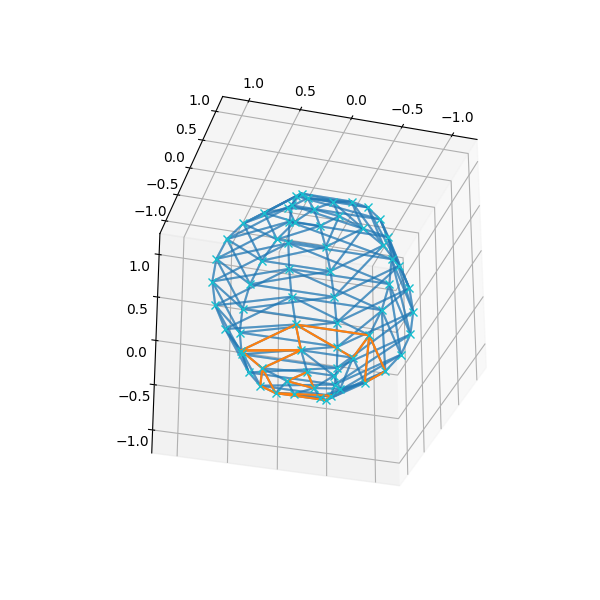

(-1.2, 1.2)

In [66]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for f in faces:
    t = pt.Triangle([0,0,0], *verts[f])
    t.plot(ax)

for i in [ 72, 87,  55,  27, 100,  38,  34]:
    t = pt.Triangle([0,0,0], *verts[faces[i]])
    points = np.array((t.a, t.b, t.c, t.a)).T
    ax.plot(*points, c="tab:orange")

ax.plot(*verts.T, "x", c="tab:cyan")
    
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)

In [8]:
verts[faces[:,0]]

array([[ 0.0000000e+00, -2.5000000e-01, -0.0000000e+00],
       [ 0.0000000e+00, -1.2500000e-01, -2.1650625e-01],
       [ 0.0000000e+00,  2.1650625e-01, -1.2500000e-01],
       [ 0.0000000e+00, -1.2500000e-01, -2.1650625e-01],
       [ 0.0000000e+00,  1.2500000e-01, -2.1650625e-01],
       [ 0.0000000e+00,  2.1650625e-01, -1.2500000e-01],
       [ 4.7835500e-02,  2.1650625e-01, -1.1548500e-01],
       [ 8.2853500e-02, -1.2500000e-01, -2.0002575e-01],
       [ 8.2853500e-02,  1.2500000e-01, -2.0002575e-01],
       [ 4.7835500e-02,  2.1650625e-01, -1.1548500e-01],
       [ 0.0000000e+00, -2.5000000e-01, -0.0000000e+00],
       [ 8.2853500e-02, -1.2500000e-01, -2.0002575e-01],
       [ 8.8388250e-02, -2.1650625e-01, -8.8388250e-02],
       [ 1.5309300e-01,  1.2500000e-01, -1.5309300e-01],
       [ 8.8388250e-02,  2.1650625e-01, -8.8388250e-02],
       [ 0.0000000e+00, -2.5000000e-01, -0.0000000e+00],
       [ 1.5309300e-01, -1.2500000e-01, -1.5309300e-01],
       [ 8.8388250e-02,  2.1650